# Chapter 14. Introduction to Network Data
## Notebook for Python

### 14.1 Representing and visualizing networks

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
edges = [("Hillary Clinton", "Donald Trump"), ("Bernie Sanders","Hillary Clinton"), ("Hillary Clinton", 
        "Barack Obama"), ("John McCain", "Donald Trump"), ("Barack Obama", "Bernie Sanders")]
g1 = nx.Graph()
g1.add_edges_from(edges)
print("Imaginary Facebook network of 5 American politicians")
print("Nodes:", g1.number_of_nodes(), "Edges: ", g1.number_of_edges())
print(g1.edges)

Imaginary Facebook network of 5 American politicians
Nodes: 5 Edges:  5
[('Hillary Clinton', 'Donald Trump'), ('Hillary Clinton', 'Bernie Sanders'), ('Hillary Clinton', 'Barack Obama'), ('Donald Trump', 'John McCain'), ('Bernie Sanders', 'Barack Obama')]


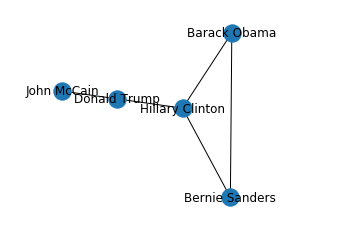

In [2]:
%matplotlib inline
nx.draw_networkx(g1)   

pos=nx.shell_layout(g1)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.40
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.box(False)
plt.show()

In [3]:
edges = [("Hillary Clinton", "Donald Trump"), ("Bernie Sanders","Hillary Clinton"), ("Hillary Clinton", 
        "Barack Obama"), ("John McCain", "Donald Trump"), ("Barack Obama", "Hillary Clinton"),
        ("Hillary Clinton", "Bernie Sanders"), ("Barack Obama", "Bernie Sanders")]
g2 = nx.DiGraph()
g2.add_edges_from(edges)
print("Imaginary Twitter network of 5 American politicians")
print("Nodes:", g2.number_of_nodes(), "Edges: ", g2.number_of_edges())
print(g2.edges)

Imaginary Twitter network of 5 American politicians
Nodes: 5 Edges:  7
[('Hillary Clinton', 'Donald Trump'), ('Hillary Clinton', 'Barack Obama'), ('Hillary Clinton', 'Bernie Sanders'), ('Bernie Sanders', 'Hillary Clinton'), ('Barack Obama', 'Hillary Clinton'), ('Barack Obama', 'Bernie Sanders'), ('John McCain', 'Donald Trump')]


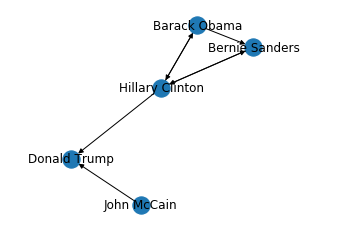

In [4]:
nx.draw_networkx(g2)

pos=nx.shell_layout(g2)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.40
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.box(False)
plt.show()

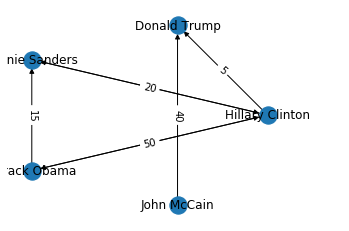

In [5]:
edges_w = [("Hillary Clinton", "Donald Trump", 5), ("Bernie Sanders","Hillary Clinton", 20), ("Hillary Clinton", 
        "Barack Obama", 30), ("John McCain", "Donald Trump", 40), ("Barack Obama", "Hillary Clinton", 50),
        ("Hillary Clinton", "Bernie Sanders", 10), ("Barack Obama", "Bernie Sanders", 15)]
g2 = nx.DiGraph()
g2.add_weighted_edges_from(edges_w)

edge_labels=dict([((u,v,),d['weight']) for u,v,d in g2.edges(data=True)])

nx.draw_networkx_edge_labels(g2,pos,edge_labels=edge_labels)
nx.draw_networkx(g2, pos)

pos=nx.spring_layout(g2)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.40
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.box(False)
plt.show()

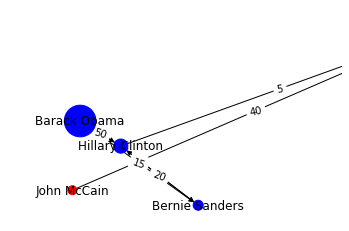

In [6]:
attrs = {'Hillary Clinton': {'followers': 100000, 'party': 'Democrat'}, 
         'Donald Trump': {'followers': 200000, 'party': 'Republican'}, 
         'Bernie Sanders': {'followers': 50000, 'party': 'Democrat'}, 
         'Barack Obama': {'followers': 500000, 'party': 'Democrat'}, 
         'John McCain': {'followers': 40000, 'party': 'Republican'} }
nx.set_node_attributes(g2, attrs)
size = nx.get_node_attributes(g2, 'followers')
size = list(size.values())

colors= nx.get_node_attributes(g2, 'party')
colors = list(colors.values())
colors = [w.replace('Democrat', 'blue') for w in colors]
colors = [w.replace('Republican', 'red') for w in colors]
colors
#list(g2.nodes(data=True))

nx.draw_networkx_edge_labels(g2,pos,edge_labels=edge_labels)
nx.draw_networkx(g2, pos, node_size=[x * 0.002 for x in size], node_color=colors)

pos=nx.spring_layout(g2)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.40
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.box(False)
plt.show()

In [7]:
g3 = g1.subgraph(['Hillary Clinton', 'Bernie Sanders', 'Barack Obama'])
print("Democrats:")
print("Nodes:", g3.number_of_nodes(), "Edges: ", g3.number_of_edges())
print(g3.edges)

g4 = g1.subgraph(['Donald Trump', 'John McCain'])
print("Republicans:")
print("Nodes:", g4.number_of_nodes(), "Edges: ", g4.number_of_edges())
print(g4.edges)

Democrats:
Nodes: 3 Edges:  3
[('Hillary Clinton', 'Bernie Sanders'), ('Hillary Clinton', 'Barack Obama'), ('Bernie Sanders', 'Barack Obama')]
Republicans:
Nodes: 2 Edges:  1
[('John McCain', 'Donald Trump')]


In [8]:
import requests
file = requests.get('http://cssbook.net/d/politicians_twitter.csv')
text_file = open("politicians_twitter.csv", "w")
text_file.write(file.text) #Save to local
text_file.close()
g2 = nx.read_adjlist("politicians_twitter.csv", create_using=nx.DiGraph, delimiter=",")
!rm politicians_twitter.csv #Remove from local
print("Nodes:", g2.number_of_nodes(), "Edges: ", g2.number_of_edges())

Nodes: 5 Edges:  7


### 14.2 Social network analysis

In [9]:
for path in nx.all_simple_paths(g1, source="Barack Obama", target="John McCain"):
    print(path)

['Barack Obama', 'Hillary Clinton', 'Donald Trump', 'John McCain']
['Barack Obama', 'Bernie Sanders', 'Hillary Clinton', 'Donald Trump', 'John McCain']


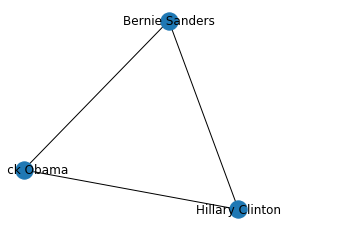

In [10]:
nx.draw_networkx(g3)
pos=nx.shell_layout(g3)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.40
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.box(False)
plt.show()

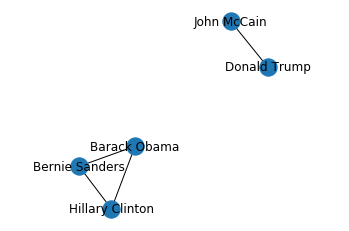

In [11]:
#Remove the friendship between Clinton and Trump in Facebook
g6 = g1.copy()
g6.remove_edge("Hillary Clinton","Donald Trump")
nx.draw_networkx(g6)
pos=nx.shell_layout(g6)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.40
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.box(False)
plt.show()

In [12]:
print("Average path length in Facebook network: ", nx.average_shortest_path_length(g1))
paths = list(nx.shortest_simple_paths(g1, "Barack Obama", "John McCain"))
print('Distance between Obama and McCain in Facebook network: ', len(paths[0])-1)

Average path length in Facebook network:  1.7
Distance between Obama and McCain in Facebook network:  3


In [13]:
print("Incident edges of John McCain in Facebook Network:", g1.edges("John McCain"))
print("Neighbors of John McCain in Facebook Network:", [n for n in g1.neighbors("John McCain")])

Incident edges of John McCain in Facebook Network: [('John McCain', 'Donald Trump')]
Neighbors of John McCain in Facebook Network: ['Donald Trump']


In [14]:
print("Density in Facebook network: ", nx.density(g1))
print("Density in Twitter network: ", nx.density(g2))
print("Transitivity in Facebook network: ", nx.transitivity(g1))
print("Diameter in Facebook network: ",nx.diameter(g1, e=None, usebounds=False))
print("Reciprocity in Twitter network: ", nx.reciprocity(g2))

Density in Facebook network:  0.5
Density in Twitter network:  0.35
Transitivity in Facebook network:  0.5
Diameter in Facebook network:  3
Reciprocity in Twitter network:  0.5714285714285714


In [15]:
print("Degree centrality of the Facebook network (undirected): \n", nx.degree_centrality(g1))
print("Degree centrality of the Twitter network (directed): \n", nx.degree_centrality(g2))
print("In degree centrality of the Twitter network (directed): \n", nx.in_degree_centrality(g2))
print("Out degree centrality of the Twitter network (directed): \n", nx.out_degree_centrality(g2))

Degree centrality of the Facebook network (undirected): 
 {'Hillary Clinton': 0.75, 'Donald Trump': 0.5, 'Bernie Sanders': 0.5, 'Barack Obama': 0.5, 'John McCain': 0.25}
Degree centrality of the Twitter network (directed): 
 {'Hillary Clinton': 1.25, 'Donald Trump': 0.5, 'Bernie Sanders': 0.75, 'Barack Obama': 0.75, 'John McCain': 0.25}
In degree centrality of the Twitter network (directed): 
 {'Hillary Clinton': 0.5, 'Donald Trump': 0.5, 'Bernie Sanders': 0.5, 'Barack Obama': 0.25, 'John McCain': 0.0}
Out degree centrality of the Twitter network (directed): 
 {'Hillary Clinton': 0.75, 'Donald Trump': 0.0, 'Bernie Sanders': 0.25, 'Barack Obama': 0.5, 'John McCain': 0.25}


In [16]:
print("Closeness centrality of the Facebook network (undirected): \n", nx.closeness_centrality(g1))
print("Eigenvector centrality of the Facebook network (undirected): \n", nx.eigenvector_centrality(g1))
print("Betweenness centrality of the Facebook network (undirected): \n", nx.betweenness_centrality(g1))

Closeness centrality of the Facebook network (undirected): 
 {'Hillary Clinton': 0.8, 'Donald Trump': 0.6666666666666666, 'Bernie Sanders': 0.5714285714285714, 'Barack Obama': 0.5714285714285714, 'John McCain': 0.4444444444444444}
Eigenvector centrality of the Facebook network (undirected): 
 {'Hillary Clinton': 0.6037035301706529, 'Donald Trump': 0.34248744909850964, 'Bernie Sanders': 0.49715259845254134, 'Barack Obama': 0.49715259845254134, 'John McCain': 0.15467056143060928}
Betweenness centrality of the Facebook network (undirected): 
 {'Hillary Clinton': 0.6666666666666666, 'Donald Trump': 0.5, 'Bernie Sanders': 0.0, 'Barack Obama': 0.0, 'John McCain': 0.0}


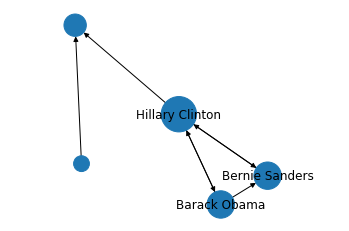

In [17]:
size = list(nx.degree_centrality(g2).values())
size = [x * 1000 for x in size]
labels_filtered = {k: v for k, v in nx.degree_centrality(g2).items() if v > 0.5 }
labels = {} 
for k, v in labels_filtered.items(): 
    labels[k] = k

nx.draw_networkx(g2, node_size= size, labels=labels)

pos=nx.shell_layout(g2)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.40
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.box(False)
plt.show()

In [478]:
print("Number of cliques: ", nx.graph_number_of_cliques(g1))
print("Cliques: ", list(nx.find_cliques(g1)))

Number of cliques:  3
Cliques:  [['John McCain', 'Donald Trump'], ['Hillary Clinton', 'Bernie Sanders', 'Barack Obama'], ['Hillary Clinton', 'Donald Trump']]


In [433]:
import networkx.algorithms.community as nxcom
cluster1 = nxcom.girvan_newman(g1)

In [434]:
print("Girvan-Neuman:")
communities1 = next(cluster1)
print("Length: ", len(communities1))
print("Membership: ", communities1)
print("Modularity: ", "%.2f" % nxcom.modularity(g1, communities1))

Girvan-Neuman:
Length:  2
Membership:  ({'Bernie Sanders', 'Barack Obama', 'Hillary Clinton'}, {'John McCain', 'Donald Trump'})
Modularity:  0.22


In [493]:
print("Louvain: ")
import community #Aditional package
cluster2 = community.best_partition(g1)
cluster2
size = float(len(set(cluster2.values())))
print("Length: ", size)
print("Membership: ", cluster2)
print("Modularity: ", "%.2f" % community.modularity(cluster2, g1))

print("Greedy optimization: ")
cluster3 = nxcom.greedy_modularity_communities(g1)
communities4 = sorted(cluster3, key=len, reverse=True)
print("Length: ", len(communities3))
print("Membership: ", communities3)
print("Modularity: ", "%.2f" % nxcom.modularity(g1, communities3))

print("Propagating label: ")
cluster4 = nxcom.asyn_lpa_communities(g1)
communities4 = sorted(cluster4, key=len, reverse=True)
print("Length: ", len(communities4))
print("Membership: ", communities4)
print("Modularity: ", "%.2f" % nxcom.modularity(g1, communities4))

Louvain: 
Length:  2.0
Membership:  {'Hillary Clinton': 0, 'Donald Trump': 1, 'Bernie Sanders': 0, 'Barack Obama': 0, 'John McCain': 1}
Modularity:  0.22
Greedy optimization: 
Length:  2
Membership:  [{'Bernie Sanders', 'Barack Obama', 'Hillary Clinton'}, {'John McCain', 'Donald Trump'}]
Modularity:  0.22
Propagating label: 
Length:  2
Membership:  [{'Bernie Sanders', 'Barack Obama', 'Hillary Clinton'}, {'John McCain', 'Donald Trump'}]
Modularity:  0.22


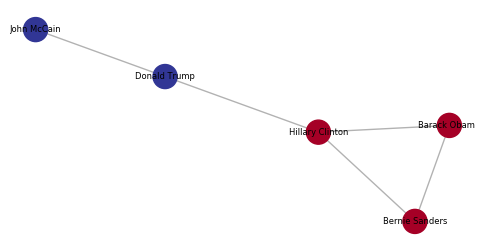

In [494]:
#Plot with Louvain algortihm
pos = nx.spring_layout(g1)
plt.figure(figsize=(6,3))
plt.axis('off')
nx.draw_networkx_labels(g1,pos,font_size=6)
nx.draw_networkx_nodes(g1, pos, cmap=plt.cm.RdYlBu, node_color=list(cluster2.values()))
nx.draw_networkx_edges(g1, pos, alpha=0.3)
plt.show(g1)